In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
advt = pd.read_csv("F:/JupyterML/ML_Practice/datasets/Advertising.csv")

In [5]:
advt.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
advt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
advt.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [8]:
advt = advt[ ['TV', 'radio', 'newspaper', 'sales']]

In [9]:
advt.head(4)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5


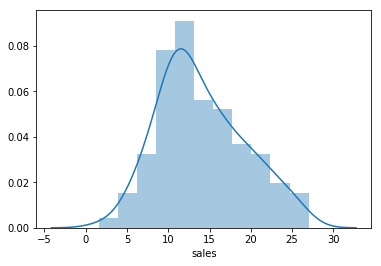

In [10]:
sns.distplot(advt.sales)

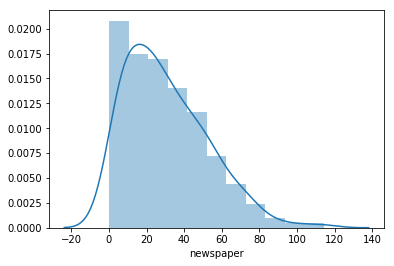

In [11]:
sns.distplot(advt.newspaper)

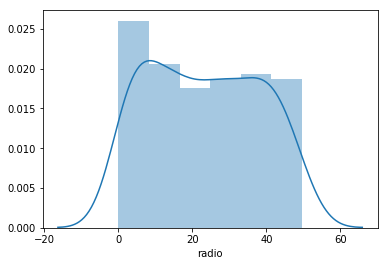

In [12]:
sns.distplot( advt.radio )

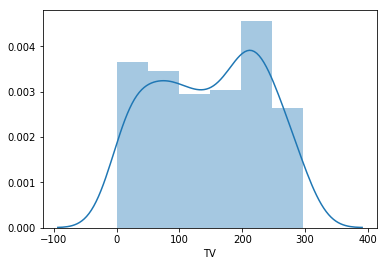

In [13]:
sns.distplot( advt.TV )

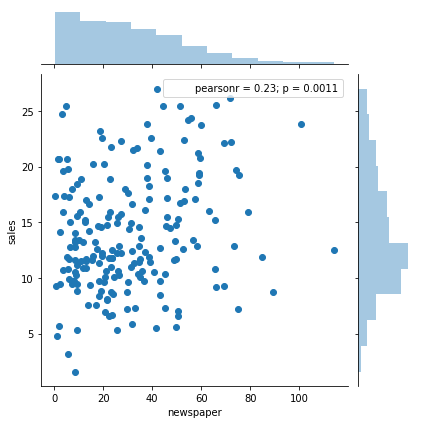

In [14]:
sns.jointplot(advt.newspaper,advt.sales)

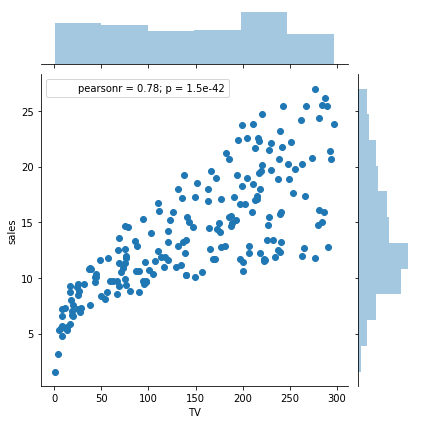

In [15]:
sns.jointplot(  advt.TV, advt.sales )

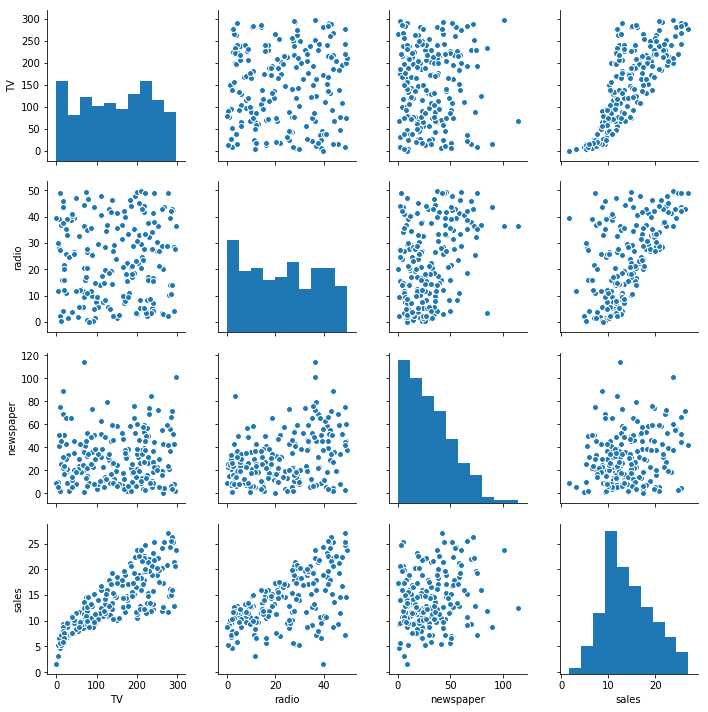

In [16]:
sns.pairplot(advt)

In [17]:
advt.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [18]:
advt.TV.corr(advt.sales)

0.7822244248616061

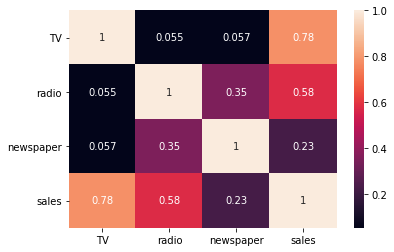

In [19]:
sns.heatmap(advt.corr(),annot =True)

In [20]:
import statsmodels.api as smf

C:\Users\apanda88\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [21]:
from sklearn.model_selection import train_test_split
y=advt.sales
x=smf.add_constant(advt.TV)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3 )

In [23]:
len( X_train )

140

In [24]:
len( X_test )

60

In [25]:
lm = smf.OLS(y_test, X_test).fit()

In [26]:
lm.params

const    6.960535
TV       0.046433
dtype: float64

In [27]:
lm.conf_int()

,0,1
const,5.287203,8.633868
TV,0.036234,0.056633


In [28]:

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     83.04
Date:                Fri, 07 Dec 2018   Prob (F-statistic):           8.64e-13
Time:                        19:50:39   Log-Likelihood:                -157.19
No. Observations:                  60   AIC:                             318.4
Df Residuals:                      58   BIC:                             322.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9605      0.836      8.327      0.000       5.287       8.634
TV             0.0464      0.005      9.113      0.000       0.036       0.057
==============================================================================
Omnibus:                        2.016   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                1.315
Skew:                           0.006   Prob(JB):                        0.518
Kurtosis:                       2.275   Cond. No.                         314.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
round( float( lm.rsquared ), 2 )

0.59

In [30]:
lmpredict = lm.predict( 
)

In [31]:
lmpredict[0:10]

37     10.429103
137    19.669328
167    16.562941
85     15.931448
72      8.204948
194    13.911600
156    11.320622
6       9.630450
166     7.791691
193    14.705609
dtype: float64

In [32]:
from statsmodels.tools.eval_measures import rmse

In [33]:
rmse(y_test,lmpredict)

3.322925347815316

In [34]:
lm.resid[1:10]

137    1.130672
167   -4.362941
85    -0.731448
72     0.595052
194    3.388400
156    3.979378
6      2.169550
166    0.208309
193    4.894391
dtype: float64

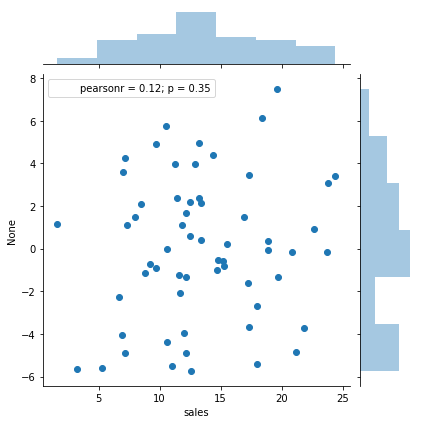

In [35]:
sns.jointplot(  advt.sales, lm.resid )

In [36]:
X = smf.add_constant( advt[['TV', 'radio','newspaper']] )

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3 )

In [38]:
X.head( 2 )

,const,TV,radio,newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1


In [39]:
lm = smf.OLS( y_train, X_train ).fit()

In [40]:
lm.params

const        2.868850
TV           0.046949
radio        0.181664
newspaper   -0.000256
dtype: float64

In [41]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     366.7
Date:                Fri, 07 Dec 2018   Prob (F-statistic):           5.81e-65
Time:                        19:50:43   Log-Likelihood:                -276.88
No. Observations:                 140   AIC:                             561.8
Df Residuals:                     136   BIC:                             573.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8689      0.387      7.420      0.000       2.104       3.633
TV             0.0469      0.002     26.928      0.000       0.044       0.050
radio          0.1817      0.011     16.606      0.000       0.160       0.203
newspaper     -0.0003      0.008     -0.034      0.973      -0.015       0.015
==============================================================================
Omnibus:                       45.784   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.422
Skew:                          -1.363   Prob(JB):                     1.28e-23
Kurtosis:                       6.263   Cond. No.                         446.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:

lmpredict = lm.predict( X )

In [43]:
rmse( y, lmpredict )

1.6744822949524052

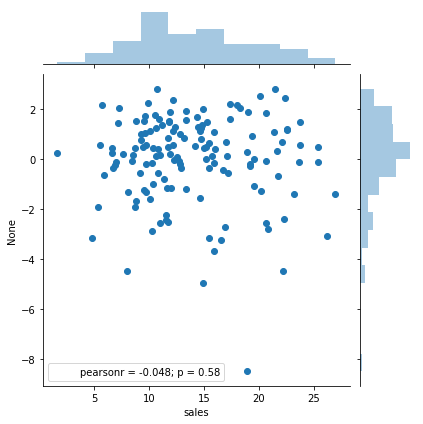

In [44]:
sns.jointplot(  advt.sales, lm.resid )

In [45]:
X = smf.add_constant( advt[['TV', 'radio']] )

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3 )

In [46]:
X_train = smf.add_constant( X_train )
X_test = smf.add_constant( X_test) 

In [47]:
lm = smf.OLS( y_train, X_train ).fit()

In [48]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     498.7
Date:                Fri, 07 Dec 2018   Prob (F-statistic):           1.30e-63
Time:                        19:50:45   Log-Likelihood:                -279.86
No. Observations:                 140   AIC:                             565.7
Df Residuals:                     137   BIC:                             574.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1096      0.372      8.355      0.000       2.374       3.846
TV             0.0455      0.002     25.258      0.000       0.042       0.049
radio          0.1820      0.010     18.005      0.000       0.162       0.202
==============================================================================
Omnibus:                       49.790   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.690
Skew:                          -1.474   Prob(JB):                     1.69e-26
Kurtosis:                       6.414   Cond. No.                         412.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
y_predict = lm.predict( X_test )

In [50]:
rmse( y_predict, y_test )

1.3661089039592078

In [51]:
residuals = y_test - y_predict

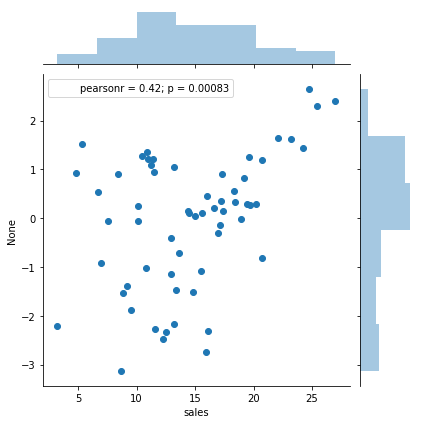

In [52]:
sns.jointplot(  y_test, residuals )

# The residuals are not randomly distributed. The p-value for the correlation is less than 0.05. So, the correlation estimated is statistically significant.

In [53]:
import pylab
import scipy.stats as stats

# Q-Q plot

In [55]:
import seaborn as sn

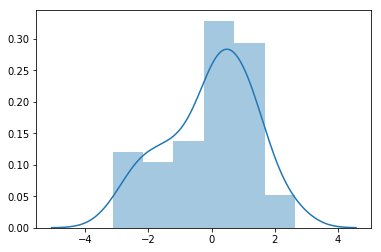

In [56]:
sn.distplot( residuals )

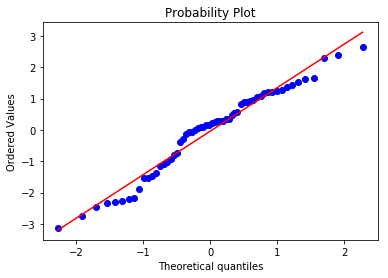

In [58]:
stats.probplot(residuals, dist='norm',plot=pylab)
pylab.show()

# Normality test for residuals

In [61]:
from scipy.stats import normaltest
normaltest(residuals)

NormaltestResult(statistic=2.621659442854949, pvalue=0.26959627375380246)

# Estimating average value of the coefficients manually

In [62]:
X.head( 5 )

,const,TV,radio
0,1.0,230.1,37.8
1,1.0,44.5,39.3
2,1.0,17.2,45.9
3,1.0,151.5,41.3
4,1.0,180.8,10.8


In [64]:
X_mat = X.as_matrix()
Y_mat = y.as_matrix()

In [65]:
from numpy.linalg import inv

In [66]:
#β̂ =(XTX)−1XTy

In [67]:
beta_vals = np.matmul( 
    np.matmul( 
        inv( np.matmul( X_mat.transpose(), X_mat ) ), X_mat.transpose() ),
    Y_mat )

In [68]:
list( beta_vals )

[2.921099912405136, 0.04575481510107613, 0.18799422662030896]

# Checking multi-collinearity

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
advt_mat = advt[['TV', "radio"]].as_matrix()

In [72]:
advt_mat.shape

(200, 2)

In [78]:
vif = [ variance_inflation_factor( advt_mat, i ) for i in range( advt_mat.shape[1] ) ]
#vif

[2.2380849001658536, 2.238084900165853]

In [76]:
vif_factors = pd.DataFrame()
#vif_factors

In [79]:
vif_factors['column'] = ['TV', "radio"]
vif_factors['vif'] = vif

In [80]:
vif_factors

,column,vif
0,TV,2.238085
1,radio,2.238085


As the VIF factors is less than 5, there is no multicolliearity between the variables

# Creating New Features

# Adding Interaction Variable

Perhaps spending  50,000ontelevisionadvertisingand 50,000 on radio advertising results in more sales than allocating $100,000 to either television or radio individually. In marketing, this is known as a synergy effect, while in statistics it is called an interaction effect




So, let's create an interaction variable for TV and Radio Spending

In [84]:
X = smf.add_constant( advt[['TV', 'radio', 'newspaper']] )

X['tv_radio'] = X.TV * X.radio

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3 )

In [85]:
X_train[0:5]

,const,TV,radio,newspaper,tv_radio
170,1.0,50.0,11.6,18.4,580.00
47,1.0,239.9,41.5,18.5,9955.85
127,1.0,80.2,0.0,9.2,0.00
85,1.0,193.2,18.4,65.7,3554.88
114,1.0,78.2,46.8,34.5,3659.76


In [86]:
lm = smf.OLS( y_train, 
              X_train ).fit()

In [87]:
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.979    
Dependent Variable: sales            AIC:                309.4084 
Date:               2018-12-07 20:35 BIC:                324.1166 
No. Observations:   140              Log-Likelihood:     -149.70  
Df Model:           4                F-statistic:        1593.    
Df Residuals:       135              Prob (F-statistic): 1.68e-112
R-squared:          0.979            Scale:              0.51537  
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const        6.8699     0.2289   30.0108   0.0000    6.4172   7.3226
TV           0.0189     0.0014   13.3160   0.0000    0.0161   0.0217
radio        0.0436     0.0092    4.7114   0.0000    0.0253   0.0618
newspaper   -0.0041     0.0032   -1.2876   0.2001   -0.0105   0.0022
tv_radio     0.0010     0.0001   19.6216   0.0000    0.0009   0.0011
------------------------------------------------------------------
Omnibus:               28.744       Durbin-Watson:          2.043 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       43.536
Skew:                  -1.041       Prob(JB):               0.000 
Kurtosis:              4.768        Condition No.:          17796 
==================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

When synergy effect is added Radio and Newspaper become not significant variables. Either TV and TV_Radio are significant variables

# Removing Radio from the model

In [88]:

X = X[['TV', 'tv_radio']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3 )

In [89]:
lm = smf.OLS( y_train, 
              X_train ).fit()

In [90]:
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.939   
Dependent Variable: sales            AIC:                773.0327
Date:               2018-12-07 20:37 BIC:                778.9160
No. Observations:   140              Log-Likelihood:     -384.52 
Df Model:           2                F-statistic:        1086.   
Df Residuals:       138              Prob (F-statistic): 3.74e-85
R-squared:          0.940            Scale:              14.434  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
TV           0.0520     0.0035   14.9769   0.0000   0.0452   0.0589
tv_radio     0.0012     0.0001   10.1711   0.0000   0.0010   0.0015
-----------------------------------------------------------------
Omnibus:               37.561       Durbin-Watson:          1.687
Prob(Omnibus):         0.000        Jarque-Bera (JB):       8.057
Skew:                  -0.184       Prob(JB):               0.018
Kurtosis:              1.884        Condition No.:          55   
=================================================================

"""

In [91]:
from sklearn.externals import joblib
joblib.dump(lm, 'lin_sales_model.pkl', compress=9)

['lin_sales_model.pkl']

In [92]:
model_clone = joblib.load('lin_sales_model.pkl')

In [93]:
model_clone.params

TV          0.052045
tv_radio    0.001239
dtype: float64

In [94]:
model_clone.conf_int(0.95)

,0,1
TV,0.051826,0.052263
tv_radio,0.001232,0.001247
